## 빅데이터 활용 AI 설계
# 강화학습 : 시뮬레이션

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 환경
- 5X5 의 격자가 있다.
- 마지막 Cell 에 도착하면 1 의 보상을 얻는다.
- 상태 : 25개 (Cell 수)
- 행동 : 4개 (상/하/좌/우)

In [19]:
Q = np.zeros([25,4])
Q[24] = 1
Qs = []
gamma = 0.99
ds = [-5,5,-1,1]

### 적용식

$$ (s,a) \Rightarrow r, s' $$
$$ Q_{new}(s,a) = r + \gamma \cdot max_{a'}[Q(s',a')] $$

- s: state
- a: action
- r: reward
- s': new state
- $\gamma$: discount rate
- s,a -> r,s -> a : sarsa

In [4]:
def valid_action(s, a):
    if s//5==0 and a==0: return False
    if s//5==4 and a==1: return False
    if s%5==0 and a==2: return False
    if s%5==4 and a==3: return False
    return True

In [5]:
def get_action(s):
    while True:
        a = np.random.randint(4)
        if valid_action(s,a): break
            
    return a

In [26]:
# 시뮬레이션 테스트

history = []
s = 0

while True:
    a = get_action(s)
    s2 = s + ds[a]
    history.append([s,a,s2])
    s = s2
    
    if s2==24: break
        
display(len(history), history)

118

[[0, 1, 5],
 [5, 3, 6],
 [6, 3, 7],
 [7, 3, 8],
 [8, 1, 13],
 [13, 0, 8],
 [8, 3, 9],
 [9, 1, 14],
 [14, 0, 9],
 [9, 1, 14],
 [14, 2, 13],
 [13, 0, 8],
 [8, 1, 13],
 [13, 3, 14],
 [14, 0, 9],
 [9, 2, 8],
 [8, 3, 9],
 [9, 2, 8],
 [8, 0, 3],
 [3, 3, 4],
 [4, 1, 9],
 [9, 1, 14],
 [14, 2, 13],
 [13, 1, 18],
 [18, 1, 23],
 [23, 0, 18],
 [18, 3, 19],
 [19, 0, 14],
 [14, 2, 13],
 [13, 3, 14],
 [14, 1, 19],
 [19, 2, 18],
 [18, 3, 19],
 [19, 2, 18],
 [18, 2, 17],
 [17, 3, 18],
 [18, 0, 13],
 [13, 1, 18],
 [18, 2, 17],
 [17, 2, 16],
 [16, 2, 15],
 [15, 3, 16],
 [16, 0, 11],
 [11, 0, 6],
 [6, 1, 11],
 [11, 0, 6],
 [6, 0, 1],
 [1, 1, 6],
 [6, 3, 7],
 [7, 0, 2],
 [2, 2, 1],
 [1, 2, 0],
 [0, 1, 5],
 [5, 3, 6],
 [6, 1, 11],
 [11, 0, 6],
 [6, 2, 5],
 [5, 0, 0],
 [0, 3, 1],
 [1, 3, 2],
 [2, 2, 1],
 [1, 3, 2],
 [2, 3, 3],
 [3, 2, 2],
 [2, 2, 1],
 [1, 3, 2],
 [2, 3, 3],
 [3, 2, 2],
 [2, 2, 1],
 [1, 1, 6],
 [6, 0, 1],
 [1, 3, 2],
 [2, 2, 1],
 [1, 1, 6],
 [6, 3, 7],
 [7, 3, 8],
 [8, 3, 9],
 [9, 1, 14],
 [1

In [5]:
def get_action(s):
    while True:
        a = np.random.randint(4)
        if valid_action(s,a): break
            
    return a

In [20]:
histories = []

for epoch in range(10):
    history = []
    s = 0
    
    while True:
        a = get_action(s)
        s2 = s + ds[a]
        history.append([s,a,s2])
        s = s2

        if s2==24: break
            
    for h in history:
        Q[h[0],h[1]] = 0 + gamma*np.max(Q[h[2]])
    
    Qs.append(Q.copy())
    histories.append(history)

In [21]:
Q

array([[0.        , 0.92274469, 0.        , 0.92274469],
       [0.        , 0.93206535, 0.91351725, 0.93206535],
       [0.        , 0.94148015, 0.92274469, 0.94148015],
       [0.        , 0.95099005, 0.93206535, 0.95099005],
       [0.        , 0.96059601, 0.94148015, 0.        ],
       [0.91351725, 0.93206535, 0.        , 0.93206535],
       [0.92274469, 0.94148015, 0.92274469, 0.94148015],
       [0.93206535, 0.95099005, 0.93206535, 0.95099005],
       [0.94148015, 0.96059601, 0.94148015, 0.96059601],
       [0.95099005, 0.970299  , 0.95099005, 0.        ],
       [0.92274469, 0.94148015, 0.        , 0.94148015],
       [0.93206535, 0.95099005, 0.93206535, 0.95099005],
       [0.94148015, 0.96059601, 0.94148015, 0.96059601],
       [0.95099005, 0.970299  , 0.95099005, 0.970299  ],
       [0.96059601, 0.9801    , 0.96059601, 0.        ],
       [0.93206535, 0.95099005, 0.        , 0.95099005],
       [0.94148015, 0.96059601, 0.94148015, 0.96059601],
       [0.95099005, 0.970299  ,

In [22]:
Q.max(axis=1).reshape(5,5)

array([[0.92274469, 0.93206535, 0.94148015, 0.95099005, 0.96059601],
       [0.93206535, 0.94148015, 0.95099005, 0.96059601, 0.970299  ],
       [0.94148015, 0.95099005, 0.96059601, 0.970299  , 0.9801    ],
       [0.95099005, 0.96059601, 0.970299  , 0.9801    , 0.99      ],
       [0.96059601, 0.970299  , 0.9801    , 0.99      , 1.        ]])

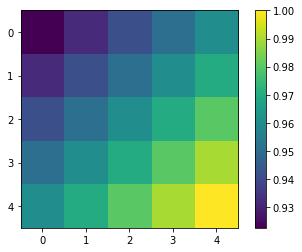

In [23]:
plt.imshow(Q.max(axis=1).reshape(5,5))
plt.colorbar()

In [24]:
Qs = np.array(Qs).reshape(-1,25,4)
Qs.shape

(10, 25, 4)

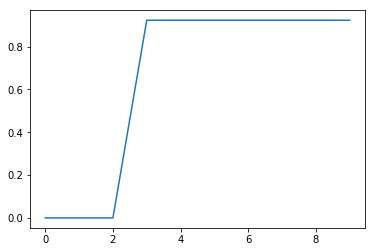

In [25]:
plt.plot(Qs.max(axis=2)[:,0])